In [1]:
from bs4 import BeautifulSoup

import nltk

from nltk.corpus import stopwords

import requests

import time

# This will be used to load the image as an object
# I used this to load a image from a url
# https://stackoverflow.com/questions/7391945/how-do-i-read-image-data-from-a-url-in-python
from PIL import Image

# Pytesseract is the software used to extract text from image
from pytesseract import pytesseract
# Tesseract requires a manuel install and a file path to the .exe file
pytesseract.tesseract_cmd = "C:\\Program Files\\Tesseract-OCR\\tesseract.exe"
# I followed this guide to learn how to use Tesseract 
# https://www.geeksforgeeks.org/how-to-extract-text-from-images-with-python/

# The function will return the text of any page of a Pan Am manuel hosted on the Miami Libraries Digital Collection
# given the link to that page
def get_text(link):
    # Grabing the html of the page
    r = requests.get(link)
    time.sleep(0.5) # Used to create delay between request and give time for the page to load
    html = r.text
    soup = BeautifulSoup(html, 'html.parser')
    
    # Getting the image link from the html
    img_link = soup.find_all('meta')[-3]['content'] # For manuel on Miami Libraries Digital Collection, a link to the image itself is in the 3rd to last meta tag under content
    image = Image.open(requests.get(img_link,stream=True).raw) # Online help cited above
    
    # Extracts the image from the text
    text = pytesseract.image_to_string(image)
    
    # Cleans up the text extracted
    text = text.replace("\n", " ")
    return text

def manuel_wf(link,pg_count):
    # To store the words and the words without stop word
    words = []
    words_ns = []
    
    # Creating a tokenizer
    tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
    
    # Getting the text from all the pages
    for i in range(pg_count):
        # Updates the link for each page
        new_link = link.replace(link[75:81],str(int(link[75:81])+i))
        # Get the text from the transcription of the page
        text = get_text(new_link)
        # Check if there is text
        if text is not None:
            tokens = tokenizer.tokenize(text)
            # tokeized the words
            for word in tokens:
                words.append(word.lower())   
    # Grabs a list of stops word    
    sw = stopwords.words('english')
    # Removes stop words
    for word in words:
        if word not in sw:
            words_ns.append(word)
            
    # This command display figures inline
    %matplotlib inline

    # Creating the word frequency distribution
    freqdist = nltk.FreqDist(words_ns)

    # Plotting the word frequency distribution
    return freqdist.plot(20)


In [2]:

# Pan Am flight manual: B707-300 aircraft operating manual
manuel_wf('https://digitalcollections.library.miami.edu/digital/collection/asm0341/id/226993/rec/6',495)

KeyboardInterrupt: 

In [ ]:
# Pan Am 727 aircraft operating manual
manuel_wf('https://digitalcollections.library.miami.edu/digital/collection/asm0341/id/224599/rec/2',299)

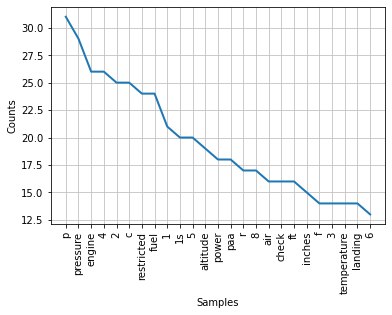

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [3]:
# Pan American Airways, Inc., Africa-Orient Division, operations engineering flight manual
manuel_wf('https://digitalcollections.library.miami.edu/digital/collection/asm0341/id/224942/rec/11',78)